# Fourier and correlation

In [1]:
# Compatibility with Python 3
from __future__ import print_function, division

In [2]:
import numpy as np  # the Python array package
import matplotlib.pyplot as plt  # the Python plotting package

In [3]:
# Tell numpy to print numbers to 4 decimal places only
np.set_printoptions(precision=4, suppress=True)

In [4]:
%matplotlib inline

In [5]:
# An example input vector
x = np.array(
    [ 0.4967, -0.1383,  0.6477,  1.523 , -0.2342, -0.2341,  1.5792,
      0.7674, -0.4695,  0.5426, -0.4634, -0.4657,  0.242 , -1.9133,
     -1.7249, -0.5623, -1.0128,  0.3142, -0.908 , -1.4123,  1.4656,
     -0.2258,  0.0675, -1.4247, -0.5444,  0.1109, -1.151 ,  0.3757,
     -0.6006, -0.2917, -0.6017,  1.8523])
N = len(x)
N

32

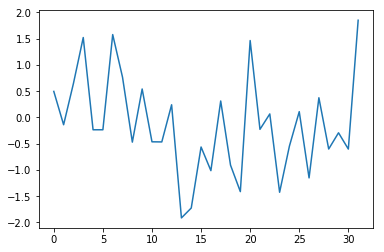

In [6]:
plt.plot(x)

In [7]:
# Now the DFT
X = np.fft.fft(x)
X

array([-4.3939+0.j    ,  9.0217-3.7036j, -0.5874-6.2268j,  2.5184+3.7749j,
        0.5008-0.8433j,  1.2904-0.4024j,  4.3391+0.8079j, -6.2614+2.1596j,
        1.8974+2.4889j,  0.1042+7.6169j,  0.3606+5.162j ,  4.7965+0.0755j,
       -5.3064-3.2329j,  4.6237+1.5287j, -2.1211+4.4873j, -4.0175-0.3712j,
       -2.0297+0.j    , -4.0175+0.3712j, -2.1211-4.4873j,  4.6237-1.5287j,
       -5.3064+3.2329j,  4.7965-0.0755j,  0.3606-5.162j ,  0.1042-7.6169j,
        1.8974-2.4889j, -6.2614-2.1596j,  4.3391-0.8079j,  1.2904+0.4024j,
        0.5008+0.8433j,  2.5184-3.7749j, -0.5874+6.2268j,  9.0217+3.7036j])

In [8]:
X.real

array([-4.3939,  9.0217, -0.5874,  2.5184,  0.5008,  1.2904,  4.3391,
       -6.2614,  1.8974,  0.1042,  0.3606,  4.7965, -5.3064,  4.6237,
       -2.1211, -4.0175, -2.0297, -4.0175, -2.1211,  4.6237, -5.3064,
        4.7965,  0.3606,  0.1042,  1.8974, -6.2614,  4.3391,  1.2904,
        0.5008,  2.5184, -0.5874,  9.0217])

In [9]:
X.imag

array([ 0.    , -3.7036, -6.2268,  3.7749, -0.8433, -0.4024,  0.8079,
        2.1596,  2.4889,  7.6169,  5.162 ,  0.0755, -3.2329,  1.5287,
        4.4873, -0.3712,  0.    ,  0.3712, -4.4873, -1.5287,  3.2329,
       -0.0755, -5.162 , -7.6169, -2.4889, -2.1596, -0.8079,  0.4024,
        0.8433, -3.7749,  6.2268,  3.7036])

In [10]:
np.sum(x)

-4.3939000000000004

In [11]:
vec_n = np.arange(N)
vec_r_1 = 2 * np.pi * vec_n / N
vec_r_1

array([ 0.    ,  0.1963,  0.3927,  0.589 ,  0.7854,  0.9817,  1.1781,
        1.3744,  1.5708,  1.7671,  1.9635,  2.1598,  2.3562,  2.5525,
        2.7489,  2.9452,  3.1416,  3.3379,  3.5343,  3.7306,  3.927 ,
        4.1233,  4.3197,  4.516 ,  4.7124,  4.9087,  5.1051,  5.3014,
        5.4978,  5.6941,  5.8905,  6.0868])

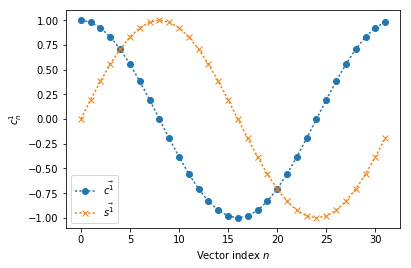

In [12]:
vec_c_1 = np.cos(vec_r_1)
vec_s_1 = np.sin(vec_r_1)
plt.plot(vec_n, vec_c_1, 'o:', label=r'$\vec{c^1}$')
plt.plot(vec_n, vec_s_1, 'x:', label=r'$\vec{s^1}$')
plt.xlabel('Vector index $n$')
plt.ylabel('$c^1_n$')
plt.legend()

In [13]:
def vector_length(vector):
    return np.sqrt(np.sum(vector ** 2))

In [14]:
c_1_len = vector_length(vec_c_1)
c_1_len

4.0

In [15]:
vector_length(vec_s_1)

4.0

In [16]:
X.real[1]

9.0217072547543466

In [17]:
def correlation(x, y):
    x_z = (x - np.mean(x)) / np.std(x)
    y_z = (y - np.mean(y)) / np.std(y)
    return np.sum(x_z * y_z) / len(x)

In [18]:
correlation(x, vec_c_1)

0.42821675308586393

In [19]:
X.imag[1]

-3.7035607495308058

In [20]:
np.corrcoef(x, vec_s_1)

array([[ 1.    ,  0.1758],
       [ 0.1758,  1.    ]])

In [21]:
demeaned_x = x - np.mean(x)
dmx_len = vector_length(demeaned_x)
dmx_len

5.2670214264978554

In [22]:
correlation_scale = dmx_len * c_1_len
correlation_scale

21.068085705991422

In [23]:
X.real[1]

9.0217072547543466

In [24]:
np.corrcoef(x, vec_c_1)[0, 1] * correlation_scale

9.0217072547543449

In [25]:
X.imag[1]

-3.7035607495308058

In [26]:
np.corrcoef(x, vec_s_1)[0, 1] * correlation_scale

3.7035607495307974

In [27]:
cosine_basis = np.zeros((N, N))
sine_basis = np.zeros((N, N))
for cycles in range(N):
    x_values = vec_r_1 * cycles
    cosine_basis[cycles, :] = np.cos(x_values)
    sine_basis[cycles, :] = -np.sin(x_values)

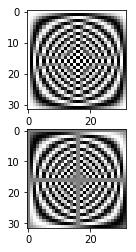

In [28]:
fig, axes = plt.subplots(2, 1)
axes[0].imshow(cosine_basis, cmap='gray')
axes[1].imshow(sine_basis, cmap='gray')

In [29]:
X_estimated = np.zeros((N, 2))
X_estimated[0, 0] = np.sum(x)
for i in range(1, N):
    X_estimated[i, 0] = correlation(x, cosine_basis[i])
    X_estimated[i, 1] = correlation(x, sine_basis[i])
X_estimated

array([[-4.3939,  0.    ],
       [ 0.4282, -0.1758],
       [-0.0279, -0.2956],
       [ 0.1195,  0.1792],
       [ 0.0238, -0.04  ],
       [ 0.0613, -0.0191],
       [ 0.206 ,  0.0383],
       [-0.2972,  0.1025],
       [ 0.0901,  0.1181],
       [ 0.0049,  0.3615],
       [ 0.0171,  0.245 ],
       [ 0.2277,  0.0036],
       [-0.2519, -0.1534],
       [ 0.2195,  0.0726],
       [-0.1007,  0.213 ],
       [-0.1907, -0.0176],
       [-0.0681, -0.052 ],
       [-0.1907,  0.0176],
       [-0.1007, -0.213 ],
       [ 0.2195, -0.0726],
       [-0.2519,  0.1534],
       [ 0.2277, -0.0036],
       [ 0.0171, -0.245 ],
       [ 0.0049, -0.3615],
       [ 0.0901, -0.1181],
       [-0.2972, -0.1025],
       [ 0.206 , -0.0383],
       [ 0.0613,  0.0191],
       [ 0.0238,  0.04  ],
       [ 0.1195, -0.1792],
       [-0.0279,  0.2956],
       [ 0.4282,  0.1758]])

In [30]:
X_estimated[1:] *= correlation_scale
X_estimated

array([[-4.3939,  0.    ],
       [ 9.0217, -3.7036],
       [-0.5874, -6.2268],
       [ 2.5184,  3.7749],
       [ 0.5008, -0.8433],
       [ 1.2904, -0.4024],
       [ 4.3391,  0.8079],
       [-6.2614,  2.1596],
       [ 1.8974,  2.4889],
       [ 0.1042,  7.6169],
       [ 0.3606,  5.162 ],
       [ 4.7965,  0.0755],
       [-5.3064, -3.2329],
       [ 4.6237,  1.5287],
       [-2.1211,  4.4873],
       [-4.0175, -0.3712],
       [-1.4352, -1.0954],
       [-4.0175,  0.3712],
       [-2.1211, -4.4873],
       [ 4.6237, -1.5287],
       [-5.3064,  3.2329],
       [ 4.7965, -0.0755],
       [ 0.3606, -5.162 ],
       [ 0.1042, -7.6169],
       [ 1.8974, -2.4889],
       [-6.2614, -2.1596],
       [ 4.3391, -0.8079],
       [ 1.2904,  0.4024],
       [ 0.5008,  0.8433],
       [ 2.5184, -3.7749],
       [-0.5874,  6.2268],
       [ 9.0217,  3.7036]])

In [31]:
X_paired = np.c_[X.real, X.imag]
X_paired

array([[-4.3939,  0.    ],
       [ 9.0217, -3.7036],
       [-0.5874, -6.2268],
       [ 2.5184,  3.7749],
       [ 0.5008, -0.8433],
       [ 1.2904, -0.4024],
       [ 4.3391,  0.8079],
       [-6.2614,  2.1596],
       [ 1.8974,  2.4889],
       [ 0.1042,  7.6169],
       [ 0.3606,  5.162 ],
       [ 4.7965,  0.0755],
       [-5.3064, -3.2329],
       [ 4.6237,  1.5287],
       [-2.1211,  4.4873],
       [-4.0175, -0.3712],
       [-2.0297,  0.    ],
       [-4.0175,  0.3712],
       [-2.1211, -4.4873],
       [ 4.6237, -1.5287],
       [-5.3064,  3.2329],
       [ 4.7965, -0.0755],
       [ 0.3606, -5.162 ],
       [ 0.1042, -7.6169],
       [ 1.8974, -2.4889],
       [-6.2614, -2.1596],
       [ 4.3391, -0.8079],
       [ 1.2904,  0.4024],
       [ 0.5008,  0.8433],
       [ 2.5184, -3.7749],
       [-0.5874,  6.2268],
       [ 9.0217,  3.7036]])

In [32]:
X_paired - X_estimated

array([[ 0.    ,  0.    ],
       [-0.    , -0.    ],
       [-0.    , -0.    ],
       [ 0.    , -0.    ],
       [ 0.    , -0.    ],
       [ 0.    , -0.    ],
       [ 0.    , -0.    ],
       [ 0.    ,  0.    ],
       [-0.    , -0.    ],
       [ 0.    , -0.    ],
       [ 0.    , -0.    ],
       [ 0.    ,  0.    ],
       [ 0.    ,  0.    ],
       [ 0.    ,  0.    ],
       [ 0.    ,  0.    ],
       [-0.    ,  0.    ],
       [-0.5945,  1.0954],
       [ 0.    ,  0.    ],
       [-0.    ,  0.    ],
       [-0.    ,  0.    ],
       [ 0.    ,  0.    ],
       [-0.    ,  0.    ],
       [-0.    ,  0.    ],
       [-0.    ,  0.    ],
       [-0.    , -0.    ],
       [-0.    ,  0.    ],
       [-0.    , -0.    ],
       [ 0.    , -0.    ],
       [ 0.    , -0.    ],
       [ 0.    ,  0.    ],
       [-0.    , -0.    ],
       [ 0.    , -0.    ]])

In [33]:
mid_point = int(N / 2)
x.dot(cosine_basis[mid_point])

-2.0297000000000001

In [34]:
correlation(cosine_basis[mid_point], x) * correlation_scale

-1.4352146337743354

In [35]:
np.corrcoef(cosine_basis[mid_point], x) * correlation_scale

array([[ 21.0681,  -1.4352],
       [ -1.4352,  21.0681]])

In [36]:
X_estimated[mid_point]

array([-1.4352, -1.0954])

In [37]:
X[mid_point]

(-2.0296999999999992+0j)

In [38]:
vector_length(cosine_basis[mid_point])

5.6568542494923806

In [39]:
lengths = np.zeros((N, 2))
for i in range(N):
    lengths[i, 0] = vector_length(cosine_basis[i])
    lengths[i, 1] = vector_length(sine_basis[i])
lengths

array([[ 5.6569,  0.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 5.6569,  0.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ],
       [ 4.    ,  4.    ]])

In [40]:
correlation(cosine_basis[mid_point], x) * dmx_len * vector_length(cosine_basis[mid_point])

-2.0297000000000001

Reconstructing

In [41]:
coefficients = X[:mid_point + 1]
coefficients

array([-4.3939+0.j    ,  9.0217-3.7036j, -0.5874-6.2268j,  2.5184+3.7749j,
        0.5008-0.8433j,  1.2904-0.4024j,  4.3391+0.8079j, -6.2614+2.1596j,
        1.8974+2.4889j,  0.1042+7.6169j,  0.3606+5.162j ,  4.7965+0.0755j,
       -5.3064-3.2329j,  4.6237+1.5287j, -2.1211+4.4873j, -4.0175-0.3712j,
       -2.0297+0.j    ])

In [42]:
scale_factors = np.ones(mid_point + 1) * 1. / N
scale_factors[1:-1] *= 2

In [43]:
scale_factors

array([ 0.0312,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,
        0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,
        0.0625,  0.0625,  0.0312])

In [44]:
reconstructed_x = np.zeros(N)
for i in range(mid_point + 1):
    reconstructed_x += cosine_basis[i] * coefficients.real[i] * scale_factors[i]
    reconstructed_x += sine_basis[i] * coefficients.imag[i] * scale_factors[i]
reconstructed_x - x

array([ 0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0.,  0.,
        0., -0., -0., -0.,  0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,
        0.,  0., -0., -0., -0., -0.])